In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./file/3_15/rr.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,101557,90960,1.000,15825.000,2.152,334.832,1.000,1.000,0.000,301.349,0.000,0.0,303.501
1,0,DC_OS,101555,101555,0.878,17970.000,1.333,8377.139,1.000,1.000,0.000,335.078,0.000,0.0,336.411
2,0,DC_MB,101554,101554,0.743,31417.944,4.083,2022.888,1.000,1.000,0.000,803.038,0.000,0.0,807.121
3,0,DC_SH,101553,101553,0.796,25950.000,0.000,42009.200,1.000,0.618,0.383,73.924,16059.200,0.0,73.924
4,0,DC_LA,101551,101551,0.756,23460.000,2.146,8009.407,1.000,1.000,0.000,33.630,0.000,0.0,35.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,105358,90960,1.000,15825.000,2.186,90.772,1.000,1.000,0.000,81.695,0.000,0.0,83.881
5041,604800,DC_OS,105355,115680,1.000,17970.000,0.286,15912.859,1.000,1.000,0.000,636.504,0.000,0.0,636.790
5042,604800,DC_MB,105351,105351,0.771,31520.544,3.578,5759.346,1.000,1.000,0.000,390.597,0.000,0.0,394.175
5043,604800,DC_SH,105349,127680,1.000,25950.000,0.000,47253.784,1.000,0.550,0.451,14.787,21303.784,0.0,14.787


In [3]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

<AxesSubplot:>

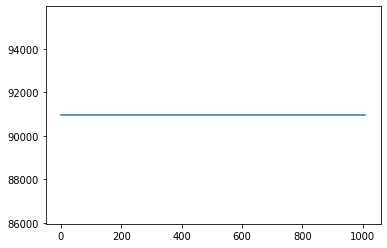

In [4]:
df_CR['finishedRequestNum'].plot()

In [5]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'OS':df_OS['dcConsume'], 'MB':df_MB['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

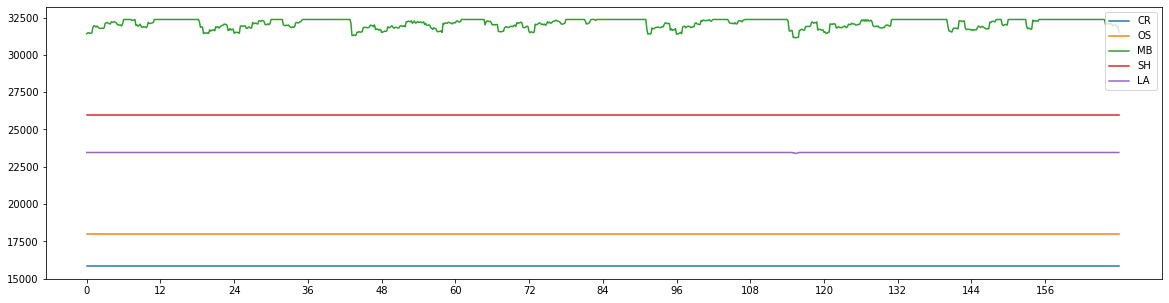

In [6]:
df_DcConsume.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [7]:
df_ReSupply = pd.DataFrame({'CR':df_CR['reSupply'], 'OS':df_OS['reSupply'], 'MB':df_MB['reSupply'], 'SH':df_SH['reSupply'], 'LA':df_LA['reSupply']})

In [8]:
df_ReSupply

,CR,OS,MB,SH,LA
0,334.832,8377.139,2022.888,42009.200,8009.407
1,327.437,13379.529,1916.951,39963.932,8584.711
2,339.878,16317.498,1907.088,39903.903,8122.849
3,343.094,20651.682,1994.129,41196.186,7854.624
4,343.690,23502.455,1919.413,42896.602,8378.870
...,...,...,...,...,...
1004,105.375,14422.227,477.140,32086.084,40976.272
1005,96.204,7333.217,496.133,31063.451,41930.919
1006,98.507,13925.495,470.609,31662.004,42404.023
1007,105.141,13178.868,497.802,31269.019,41127.453


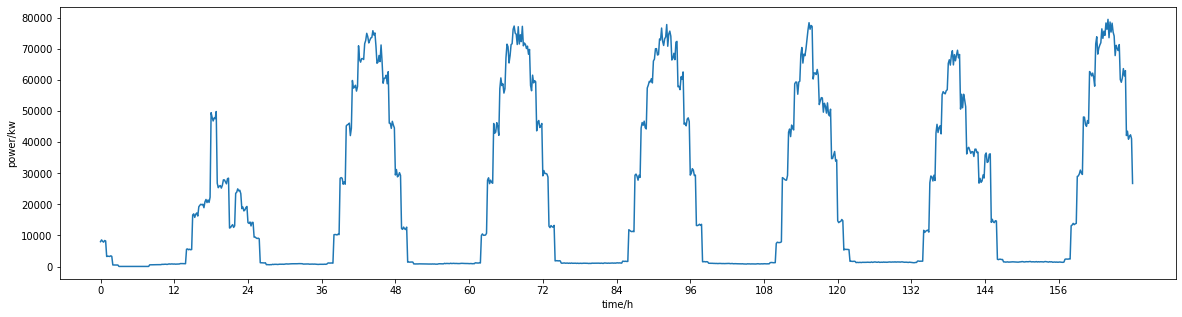

In [9]:
df_ReSupply['LA'].plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.show()

In [10]:
ss = []
for i in range(17):
    s = 0
    for j in df_ReSupply['OS']:
        if j>i*2000 and j<(i+1)*2000:
            s += 1
    ss.append(s)
ss

[2, 3, 26, 37, 54, 82, 124, 144, 151, 134, 99, 66, 47, 20, 15, 4, 1]

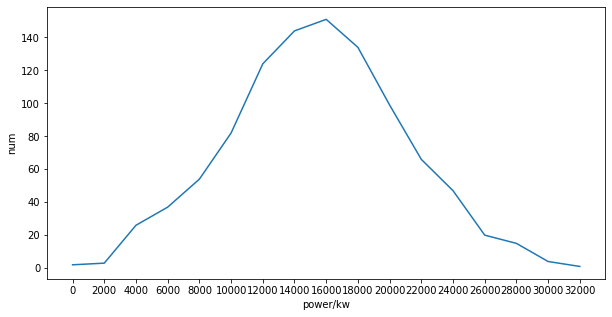

In [11]:
fig = plt.figure(figsize= (10, 5))
plt.xlabel("power/kw")
plt.ylabel("num")
plt.xticks(np.arange(0, 17, 1), np.arange(0, 34000, 2000))
plt.plot(ss)
plt.show()

In [12]:
df_RequestNum = pd.DataFrame({'CR':df_CR['requestNum'], 'OS':df_OS['requestNum'], 'MB':df_MB['requestNum'], 'SH':df_SH['requestNum'], 'LA':df_LA['requestNum']})

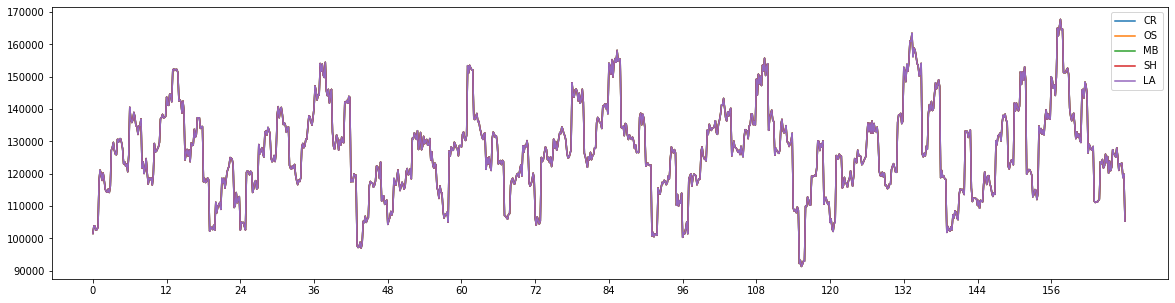

In [13]:
df_RequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [14]:
df_FinishedRequestNum = pd.DataFrame({'CR':df_CR['finishedRequestNum'], 'OS':df_OS['finishedRequestNum'], 'MB':df_MB['finishedRequestNum'], 'SH':df_SH['finishedRequestNum'], 'LA':df_LA['finishedRequestNum']})

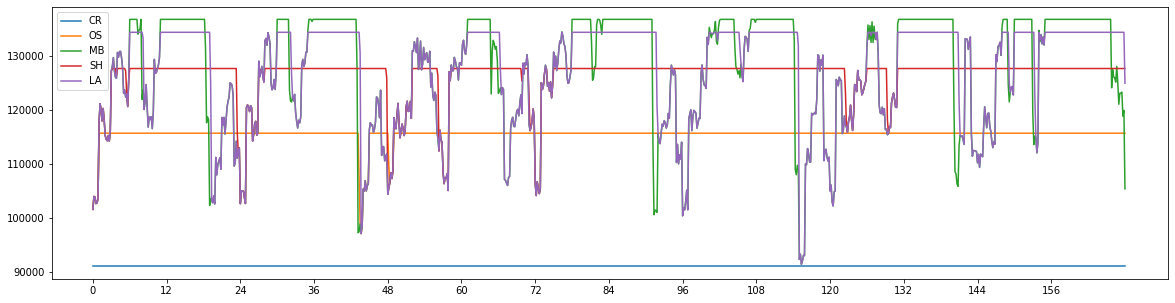

In [15]:
df_FinishedRequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [16]:
df_BaSupply = pd.DataFrame({'CR':df_CR['baSupply'], 'OS':df_OS['baSupply'], 'MB':df_MB['baSupply'], 'SH':df_SH['baSupply'], 'LA':df_LA['baSupply']})

In [17]:
#for i in [216]
df_BaSupply['LA'][216:288].sum()

1000000.012

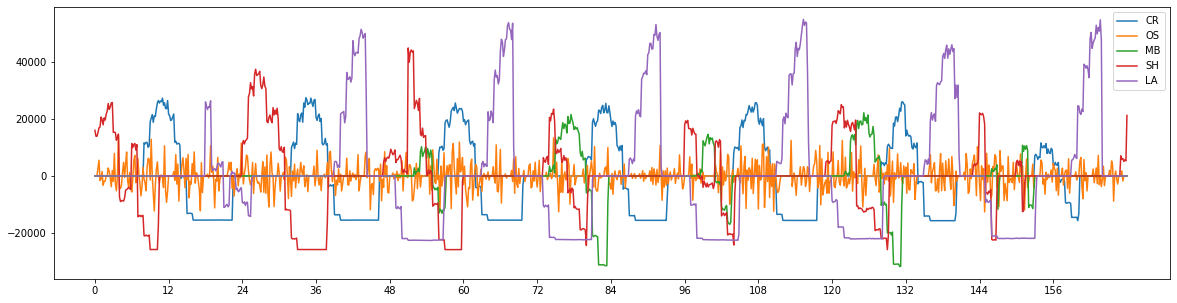

In [18]:
df_BaSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [19]:
df_DcPrice = pd.DataFrame({'CR':df_CR['dcPrice'], 'OS':df_OS['dcPrice'], 'MB':df_MB['dcPrice'], 'SH':df_SH['dcPrice'], 'LA':df_LA['dcPrice']})

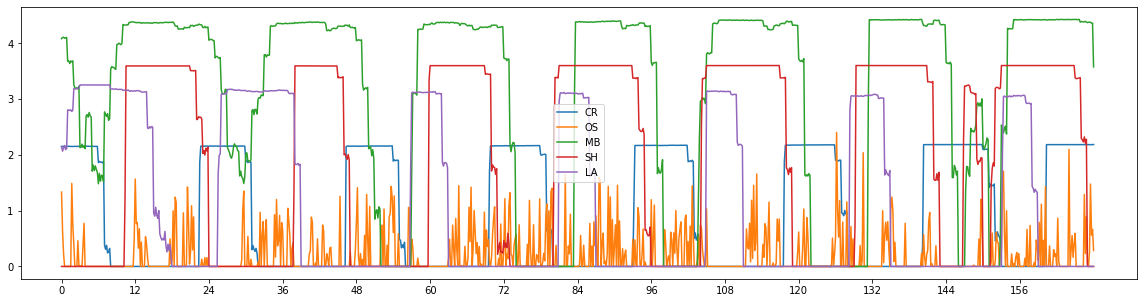

In [20]:
df_DcPrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [21]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})

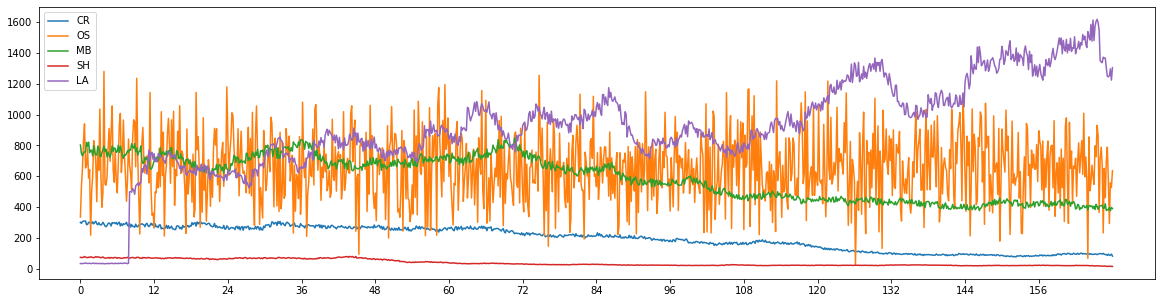

In [22]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [23]:
df_Cost = pd.DataFrame({'CR':df_CR['cost'], 'OS':df_OS['cost'], 'MB':df_MB['cost'], 'SH':df_SH['cost'], 'LA':df_LA['cost']})

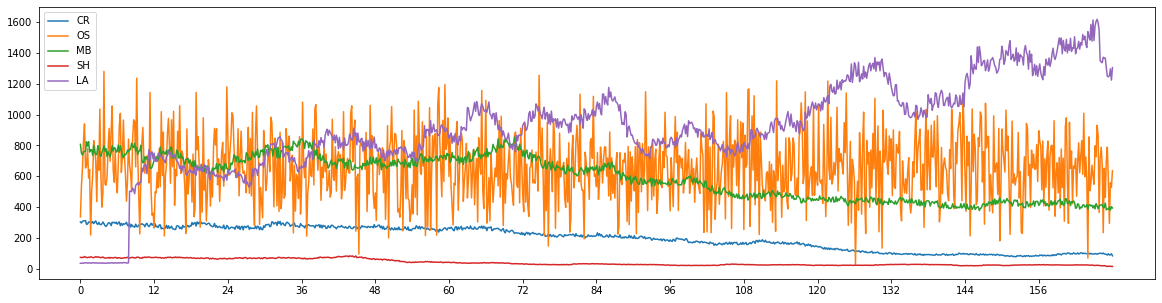

In [24]:
df_Cost.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [25]:
df_ReUsage = pd.DataFrame({'CR':df_CR['reUsage'], 'OS':df_OS['reUsage'], 'MB':df_MB['reUsage'], 'SH':df_SH['reUsage'], 'LA':df_LA['reUsage']})

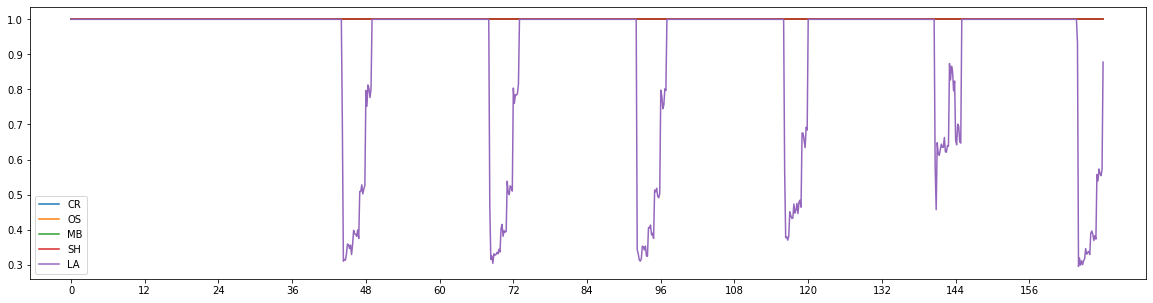

In [26]:
df_ReUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

<AxesSubplot:>

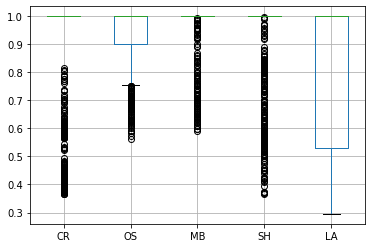

In [27]:
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})
df_ReDcUsage.boxplot()